<a href="https://colab.research.google.com/github/AndresInsuasty/tesis-cafes-especiales/blob/main/utils/RecorteOrtomosaicos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Recorte de mapas ortomosaicos

## Librerias

In [1]:
import os
import pandas as pd
import cv2
from google.colab.patches import cv2_imshow
import random

## Variables de ambiente

In [2]:
PATH_NDVI = "/content/drive/MyDrive/Documentos/MaIE/Mapas NDVI"
PATH_ORTOMOSAICOS = "/content/drive/MyDrive/Documentos/MaIE/Ortomosaicos"

## Listar imagenes

### NDVI

In [3]:
data = pd.DataFrame(columns=['img_names','ndvi_names','ndvi_names_path'])
img_names = []
ndvi_names = []
ndvi_names_path = []
for file in os.listdir(PATH_NDVI):
    if file.endswith('.jpg'):
        img_names.append(file[:-4])
        ndvi_names.append(file)
        ndvi_names_path.append(PATH_NDVI+'/'+file)
data['img_names'] = img_names
data['ndvi_names'] = ndvi_names
data['ndvi_names_path'] = ndvi_names_path
data

,img_names,ndvi_names,ndvi_names_path
0,LomaGorda_20210502_01,LomaGorda_20210502_01.jpg,/content/drive/MyDrive/Documentos/MaIE/Mapas N...
1,ElArrayan_20211002_01,ElArrayan_20211002_01.jpg,/content/drive/MyDrive/Documentos/MaIE/Mapas N...
2,LaMina_20210502_01,LaMina_20210502_01.jpg,/content/drive/MyDrive/Documentos/MaIE/Mapas N...
3,LaMina_20210502_02,LaMina_20210502_02.jpg,/content/drive/MyDrive/Documentos/MaIE/Mapas N...
4,LaMina_20210626_01,LaMina_20210626_01.jpg,/content/drive/MyDrive/Documentos/MaIE/Mapas N...
5,ElArrayan_20210612_01,ElArrayan_20210612_01.jpg,/content/drive/MyDrive/Documentos/MaIE/Mapas N...
6,ElArrayan_20210626_01,ElArrayan_20210626_01.jpg,/content/drive/MyDrive/Documentos/MaIE/Mapas N...
7,ElArrayan_20210827_01,ElArrayan_20210827_01.jpg,/content/drive/MyDrive/Documentos/MaIE/Mapas N...
8,LaMina_20211002_01,LaMina_20211002_01.jpg,/content/drive/MyDrive/Documentos/MaIE/Mapas N...
9,LaMina_20210827_01,LaMina_20210827_01.jpg,/content/drive/MyDrive/Documentos/MaIE/Mapas N...


### Ortomosaicos

In [4]:
ort_names = []
for file in os.listdir(PATH_ORTOMOSAICOS):
    if file.endswith('.tif'):
        ort_names.append(file)        
        #ort_names_path.append(PATH_ORTOMOSAICOS+'/'+file)

In [5]:
ls_b1 = []
ls_b2 = []
ls_b3 = []
ls_b4 = []
for name in data.img_names:
    name_b1 = name+'_B1.tif'
    name_b2 = name+'_B2.tif'
    name_b3 = name+'_B3.tif'
    name_b4 = name+'_B4.tif'
    if name_b1 in ort_names:
        ls_b1.append(name)
    if name_b2 in ort_names:
        ls_b2.append(name) 
    if name_b3 in ort_names:
        ls_b3.append(name) 
    if name_b4 in ort_names:
        ls_b4.append(name)     

df_b1 = pd.DataFrame(ls_b1,columns=['img_names'])
df_b1['B1_name'] = df_b1.img_names+'_B1.tif'
df_b1['B1_name_path'] = PATH_ORTOMOSAICOS+'/'+df_b1.B1_name 

df_b2 = pd.DataFrame(ls_b2,columns=['img_names'])
df_b2['B2_name'] = df_b2.img_names+'_B2.tif'
df_b2['B2_name_path'] = PATH_ORTOMOSAICOS+'/'+df_b2.B2_name

df_b3 = pd.DataFrame(ls_b3,columns=['img_names'])
df_b3['B3_name'] = df_b3.img_names+'_B3.tif'
df_b3['B3_name_path'] = PATH_ORTOMOSAICOS+'/'+df_b3.B3_name

df_b4 = pd.DataFrame(ls_b4,columns=['img_names'])
df_b4['B4_name'] = df_b4.img_names+'_B4.tif'
df_b4['B4_name_path'] = PATH_ORTOMOSAICOS+'/'+df_b4.B4_name

In [6]:
df_b1

,img_names,B1_name,B1_name_path
0,LomaGorda_20210502_01,LomaGorda_20210502_01_B1.tif,/content/drive/MyDrive/Documentos/MaIE/Ortomos...
1,ElArrayan_20211002_01,ElArrayan_20211002_01_B1.tif,/content/drive/MyDrive/Documentos/MaIE/Ortomos...
2,LaMina_20210502_01,LaMina_20210502_01_B1.tif,/content/drive/MyDrive/Documentos/MaIE/Ortomos...
3,LaMina_20210502_02,LaMina_20210502_02_B1.tif,/content/drive/MyDrive/Documentos/MaIE/Ortomos...
4,LaMina_20210626_01,LaMina_20210626_01_B1.tif,/content/drive/MyDrive/Documentos/MaIE/Ortomos...
5,ElArrayan_20210612_01,ElArrayan_20210612_01_B1.tif,/content/drive/MyDrive/Documentos/MaIE/Ortomos...
6,ElArrayan_20210827_01,ElArrayan_20210827_01_B1.tif,/content/drive/MyDrive/Documentos/MaIE/Ortomos...
7,LaMina_20211002_01,LaMina_20211002_01_B1.tif,/content/drive/MyDrive/Documentos/MaIE/Ortomos...
8,LaMina_20210827_01,LaMina_20210827_01_B1.tif,/content/drive/MyDrive/Documentos/MaIE/Ortomos...
9,LaMina_20210320_01,LaMina_20210320_01_B1.tif,/content/drive/MyDrive/Documentos/MaIE/Ortomos...


In [7]:
data = pd.merge(data,df_b1,on='img_names',how='left')
data = pd.merge(data,df_b2,on='img_names',how='left')
data = pd.merge(data,df_b3,on='img_names',how='left')
data = pd.merge(data,df_b4,on='img_names',how='left')

In [8]:
data

,img_names,ndvi_names,ndvi_names_path,B1_name,B1_name_path,B2_name,B2_name_path,B3_name,B3_name_path,B4_name,B4_name_path
0,LomaGorda_20210502_01,LomaGorda_20210502_01.jpg,/content/drive/MyDrive/Documentos/MaIE/Mapas N...,LomaGorda_20210502_01_B1.tif,/content/drive/MyDrive/Documentos/MaIE/Ortomos...,LomaGorda_20210502_01_B2.tif,/content/drive/MyDrive/Documentos/MaIE/Ortomos...,LomaGorda_20210502_01_B3.tif,/content/drive/MyDrive/Documentos/MaIE/Ortomos...,LomaGorda_20210502_01_B4.tif,/content/drive/MyDrive/Documentos/MaIE/Ortomos...
1,ElArrayan_20211002_01,ElArrayan_20211002_01.jpg,/content/drive/MyDrive/Documentos/MaIE/Mapas N...,ElArrayan_20211002_01_B1.tif,/content/drive/MyDrive/Documentos/MaIE/Ortomos...,ElArrayan_20211002_01_B2.tif,/content/drive/MyDrive/Documentos/MaIE/Ortomos...,ElArrayan_20211002_01_B3.tif,/content/drive/MyDrive/Documentos/MaIE/Ortomos...,ElArrayan_20211002_01_B4.tif,/content/drive/MyDrive/Documentos/MaIE/Ortomos...
2,LaMina_20210502_01,LaMina_20210502_01.jpg,/content/drive/MyDrive/Documentos/MaIE/Mapas N...,LaMina_20210502_01_B1.tif,/content/drive/MyDrive/Documentos/MaIE/Ortomos...,LaMina_20210502_01_B2.tif,/content/drive/MyDrive/Documentos/MaIE/Ortomos...,LaMina_20210502_01_B3.tif,/content/drive/MyDrive/Documentos/MaIE/Ortomos...,LaMina_20210502_01_B4.tif,/content/drive/MyDrive/Documentos/MaIE/Ortomos...
3,LaMina_20210502_02,LaMina_20210502_02.jpg,/content/drive/MyDrive/Documentos/MaIE/Mapas N...,LaMina_20210502_02_B1.tif,/content/drive/MyDrive/Documentos/MaIE/Ortomos...,LaMina_20210502_02_B2.tif,/content/drive/MyDrive/Documentos/MaIE/Ortomos...,LaMina_20210502_02_B3.tif,/content/drive/MyDrive/Documentos/MaIE/Ortomos...,LaMina_20210502_02_B4.tif,/content/drive/MyDrive/Documentos/MaIE/Ortomos...
4,LaMina_20210626_01,LaMina_20210626_01.jpg,/content/drive/MyDrive/Documentos/MaIE/Mapas N...,LaMina_20210626_01_B1.tif,/content/drive/MyDrive/Documentos/MaIE/Ortomos...,LaMina_20210626_01_B2.tif,/content/drive/MyDrive/Documentos/MaIE/Ortomos...,LaMina_20210626_01_B3.tif,/content/drive/MyDrive/Documentos/MaIE/Ortomos...,LaMina_20210626_01_B4.tif,/content/drive/MyDrive/Documentos/MaIE/Ortomos...
5,ElArrayan_20210612_01,ElArrayan_20210612_01.jpg,/content/drive/MyDrive/Documentos/MaIE/Mapas N...,ElArrayan_20210612_01_B1.tif,/content/drive/MyDrive/Documentos/MaIE/Ortomos...,ElArrayan_20210612_01_B2.tif,/content/drive/MyDrive/Documentos/MaIE/Ortomos...,ElArrayan_20210612_01_B3.tif,/content/drive/MyDrive/Documentos/MaIE/Ortomos...,ElArrayan_20210612_01_B4.tif,/content/drive/MyDrive/Documentos/MaIE/Ortomos...
6,ElArrayan_20210626_01,ElArrayan_20210626_01.jpg,/content/drive/MyDrive/Documentos/MaIE/Mapas N...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,ElArrayan_20210827_01,ElArrayan_20210827_01.jpg,/content/drive/MyDrive/Documentos/MaIE/Mapas N...,ElArrayan_20210827_01_B1.tif,/content/drive/MyDrive/Documentos/MaIE/Ortomos...,ElArrayan_20210827_01_B2.tif,/content/drive/MyDrive/Documentos/MaIE/Ortomos...,ElArrayan_20210827_01_B3.tif,/content/drive/MyDrive/Documentos/MaIE/Ortomos...,ElArrayan_20210827_01_B4.tif,/content/drive/MyDrive/Documentos/MaIE/Ortomos...
8,LaMina_20211002_01,LaMina_20211002_01.jpg,/content/drive/MyDrive/Documentos/MaIE/Mapas N...,LaMina_20211002_01_B1.tif,/content/drive/MyDrive/Documentos/MaIE/Ortomos...,LaMina_20211002_01_B2.tif,/content/drive/MyDrive/Documentos/MaIE/Ortomos...,LaMina_20211002_01_B3.tif,/content/drive/MyDrive/Documentos/MaIE/Ortomos...,LaMina_20211002_01_B4.tif,/content/drive/MyDrive/Documentos/MaIE/Ortomos...
9,LaMina_20210827_01,LaMina_20210827_01.jpg,/content/drive/MyDrive/Documentos/MaIE/Mapas N...,LaMina_20210827_01_B1.tif,/content/drive/MyDrive/Documentos/MaIE/Ortomos...,LaMina_20210827_01_B2.tif,/content/drive/MyDrive/Documentos/MaIE/Ortomos...,LaMina_20210827_01_B3.tif,/content/drive/MyDrive/Documentos/MaIE/Ortomos...,LaMina_20210827_01_B4.tif,/content/drive/MyDrive/Documentos/MaIE/Ortomos...


## Eliminando vacios

In [9]:
data_c = data.dropna()
data_c

,img_names,ndvi_names,ndvi_names_path,B1_name,B1_name_path,B2_name,B2_name_path,B3_name,B3_name_path,B4_name,B4_name_path
0,LomaGorda_20210502_01,LomaGorda_20210502_01.jpg,/content/drive/MyDrive/Documentos/MaIE/Mapas N...,LomaGorda_20210502_01_B1.tif,/content/drive/MyDrive/Documentos/MaIE/Ortomos...,LomaGorda_20210502_01_B2.tif,/content/drive/MyDrive/Documentos/MaIE/Ortomos...,LomaGorda_20210502_01_B3.tif,/content/drive/MyDrive/Documentos/MaIE/Ortomos...,LomaGorda_20210502_01_B4.tif,/content/drive/MyDrive/Documentos/MaIE/Ortomos...
1,ElArrayan_20211002_01,ElArrayan_20211002_01.jpg,/content/drive/MyDrive/Documentos/MaIE/Mapas N...,ElArrayan_20211002_01_B1.tif,/content/drive/MyDrive/Documentos/MaIE/Ortomos...,ElArrayan_20211002_01_B2.tif,/content/drive/MyDrive/Documentos/MaIE/Ortomos...,ElArrayan_20211002_01_B3.tif,/content/drive/MyDrive/Documentos/MaIE/Ortomos...,ElArrayan_20211002_01_B4.tif,/content/drive/MyDrive/Documentos/MaIE/Ortomos...
2,LaMina_20210502_01,LaMina_20210502_01.jpg,/content/drive/MyDrive/Documentos/MaIE/Mapas N...,LaMina_20210502_01_B1.tif,/content/drive/MyDrive/Documentos/MaIE/Ortomos...,LaMina_20210502_01_B2.tif,/content/drive/MyDrive/Documentos/MaIE/Ortomos...,LaMina_20210502_01_B3.tif,/content/drive/MyDrive/Documentos/MaIE/Ortomos...,LaMina_20210502_01_B4.tif,/content/drive/MyDrive/Documentos/MaIE/Ortomos...
3,LaMina_20210502_02,LaMina_20210502_02.jpg,/content/drive/MyDrive/Documentos/MaIE/Mapas N...,LaMina_20210502_02_B1.tif,/content/drive/MyDrive/Documentos/MaIE/Ortomos...,LaMina_20210502_02_B2.tif,/content/drive/MyDrive/Documentos/MaIE/Ortomos...,LaMina_20210502_02_B3.tif,/content/drive/MyDrive/Documentos/MaIE/Ortomos...,LaMina_20210502_02_B4.tif,/content/drive/MyDrive/Documentos/MaIE/Ortomos...
4,LaMina_20210626_01,LaMina_20210626_01.jpg,/content/drive/MyDrive/Documentos/MaIE/Mapas N...,LaMina_20210626_01_B1.tif,/content/drive/MyDrive/Documentos/MaIE/Ortomos...,LaMina_20210626_01_B2.tif,/content/drive/MyDrive/Documentos/MaIE/Ortomos...,LaMina_20210626_01_B3.tif,/content/drive/MyDrive/Documentos/MaIE/Ortomos...,LaMina_20210626_01_B4.tif,/content/drive/MyDrive/Documentos/MaIE/Ortomos...
5,ElArrayan_20210612_01,ElArrayan_20210612_01.jpg,/content/drive/MyDrive/Documentos/MaIE/Mapas N...,ElArrayan_20210612_01_B1.tif,/content/drive/MyDrive/Documentos/MaIE/Ortomos...,ElArrayan_20210612_01_B2.tif,/content/drive/MyDrive/Documentos/MaIE/Ortomos...,ElArrayan_20210612_01_B3.tif,/content/drive/MyDrive/Documentos/MaIE/Ortomos...,ElArrayan_20210612_01_B4.tif,/content/drive/MyDrive/Documentos/MaIE/Ortomos...
7,ElArrayan_20210827_01,ElArrayan_20210827_01.jpg,/content/drive/MyDrive/Documentos/MaIE/Mapas N...,ElArrayan_20210827_01_B1.tif,/content/drive/MyDrive/Documentos/MaIE/Ortomos...,ElArrayan_20210827_01_B2.tif,/content/drive/MyDrive/Documentos/MaIE/Ortomos...,ElArrayan_20210827_01_B3.tif,/content/drive/MyDrive/Documentos/MaIE/Ortomos...,ElArrayan_20210827_01_B4.tif,/content/drive/MyDrive/Documentos/MaIE/Ortomos...
8,LaMina_20211002_01,LaMina_20211002_01.jpg,/content/drive/MyDrive/Documentos/MaIE/Mapas N...,LaMina_20211002_01_B1.tif,/content/drive/MyDrive/Documentos/MaIE/Ortomos...,LaMina_20211002_01_B2.tif,/content/drive/MyDrive/Documentos/MaIE/Ortomos...,LaMina_20211002_01_B3.tif,/content/drive/MyDrive/Documentos/MaIE/Ortomos...,LaMina_20211002_01_B4.tif,/content/drive/MyDrive/Documentos/MaIE/Ortomos...
9,LaMina_20210827_01,LaMina_20210827_01.jpg,/content/drive/MyDrive/Documentos/MaIE/Mapas N...,LaMina_20210827_01_B1.tif,/content/drive/MyDrive/Documentos/MaIE/Ortomos...,LaMina_20210827_01_B2.tif,/content/drive/MyDrive/Documentos/MaIE/Ortomos...,LaMina_20210827_01_B3.tif,/content/drive/MyDrive/Documentos/MaIE/Ortomos...,LaMina_20210827_01_B4.tif,/content/drive/MyDrive/Documentos/MaIE/Ortomos...
10,LaMina_20210320_01,LaMina_20210320_01.jpg,/content/drive/MyDrive/Documentos/MaIE/Mapas N...,LaMina_20210320_01_B1.tif,/content/drive/MyDrive/Documentos/MaIE/Ortomos...,LaMina_20210320_01_B2.tif,/content/drive/MyDrive/Docu

In [10]:
a=data_c.iloc[16]

## Recorte de ortomosaicos

In [15]:
for i in range(data_c.shape[0]):
    aux = data_c.iloc[i]
    ndvi = cv2.imread(aux.ndvi_names_path)
    b1 = cv2.imread(aux.B1_name_path)
    b2 = cv2.imread(aux.B2_name_path)
    b3 = cv2.imread(aux.B3_name_path)
    b4 = cv2.imread(aux.B4_name_path)
    if (ndvi.shape == b1.shape) and (ndvi.shape == b2.shape) and (ndvi.shape == b3.shape) and (ndvi.shape == b4.shape):
        random.seed(10)
        ### ciclo for
        for j in range(300):
            fila_a = 0
            fila_b = ndvi.shape[0]-256-1
            col_a = 0
            col_b = ndvi.shape[1]-256-1
            x = random.randint(fila_a,fila_b)
            y = random.randint(col_a,col_b)  
            ndvi_new = ndvi[x:x+256,y:y+256]
            b1_new = b1[x:x+256,y:y+256]
            b2_new = b2[x:x+256,y:y+256]
            b3_new = b3[x:x+256,y:y+256]
            b4_new = b4[x:x+256,y:y+256]
            codigo = "{img_names}_".format(img_names=aux.img_names)
            cv2.imwrite("/content/drive/MyDrive/segmentado/dataset2/ndvi/{codigo}ndvi_{j}.jpg".format(codigo=codigo,j=j), ndvi_new)
            cv2.imwrite("/content/drive/MyDrive/segmentado/dataset2/bandas/{codigo}b1_{j}.jpg".format(codigo=codigo,j=j), b1_new)
            cv2.imwrite("/content/drive/MyDrive/segmentado/dataset2/bandas/{codigo}b2_{j}.jpg".format(codigo=codigo,j=j), b2_new)
            cv2.imwrite("/content/drive/MyDrive/segmentado/dataset2/bandas/{codigo}b3_{j}.jpg".format(codigo=codigo,j=j), b3_new)
            cv2.imwrite("/content/drive/MyDrive/segmentado/dataset2/bandas/{codigo}b4_{j}.jpg".format(codigo=codigo,j=j), b4_new)
    else:
        print("el tamaño no coincide:",aux.img_names)
print(x,y, ndvi.shape)
#img = cv2.imread(path)

2004 1580 (2827, 2869, 3)


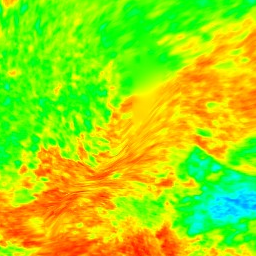

In [12]:
cv2_imshow(ndvi_new) 

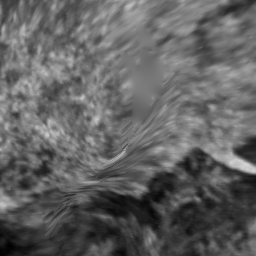

In [13]:
cv2_imshow(b1_new)

In [14]:
codigo = "{img_names}_".format(img_names=aux.img_names)
"{codigo}ndvi_{j}".format(codigo=codigo,j=1)

'LomaGorda_20210502_01_ndvi_1'